In [14]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [8]:
# Importing the training set
dataset_train = pd.read_csv('MSFT_train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [9]:
training_set.shape

(1223, 1)

In [10]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [11]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1223):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [15]:
# Initialising the RNN
model = keras.Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(layers.LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(layers.Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(layers.LSTM(units = 50, return_sequences = True))
model.add(layers.Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(layers.LSTM(units = 50, return_sequences = True))
model.add(layers.Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(layers.LSTM(units = 50))
model.add(layers.Dropout(0.2))

# Adding the output layer
model.add(layers.Dense(units = 1))

# display summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [16]:
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 80, batch_size = 32)

Epoch 1/100
37/37 [==============================] - 11s 108ms/step - loss: 0.0251
Epoch 2/100
37/37 [==============================] - 4s 108ms/step - loss: 0.0040
Epoch 3/100
37/37 [==============================] - 4s 109ms/step - loss: 0.0037
Epoch 4/100
37/37 [==============================] - 4s 108ms/step - loss: 0.0034
Epoch 5/100
37/37 [==============================] - 4s 108ms/step - loss: 0.0031
Epoch 6/100
37/37 [==============================] - 4s 108ms/step - loss: 0.0034
Epoch 7/100
37/37 [==============================] - 4s 108ms/step - loss: 0.0039
Epoch 8/100
37/37 [==============================] - 4s 109ms/step - loss: 0.0028
Epoch 9/100
37/37 [==============================] - 4s 108ms/step - loss: 0.0026
Epoch 10/100
37/37 [==============================] - 4s 107ms/step - loss: 0.0028
Epoch 11/100
37/37 [==============================] - 4s 108ms/step - loss: 0.0031
Epoch 12/100
37/37 [==============================] - 4s 106ms/step - loss: 0.0028
Epoch 13/100

In [18]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('MSFT_test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [20]:
real_stock_price.shape

(36, 1)

In [21]:
# Getting the predicted stock price of last two months
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
# 96 is the 60 day interval plus the 36 days since 1st Apr
for i in range(60, 96):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

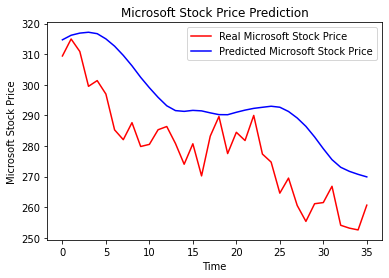

In [22]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Microsoft Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Microsoft Stock Price')
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Microsoft Stock Price')
plt.legend()
plt.show()